# Predictions

## Data wrangling

In [1]:
# Preamble
import pandas as pd
import numpy as np
pd.set_option("mode.chained_assignment", None)
import random
random.seed(1509)
import matplotlib.pyplot as plt
import lightgbm as lgb
import pyarrow.feather as feather
from os import chdir, getcwd
import statsmodels.api as sm

# sci-kit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data_dir = '/home/jovyan/work/Data/'
results_dir = '/home/jovyan/work/Results/'

In [3]:
select_features = ['reporter.ISO', 'partner.ISO', 'year',
                   'ln.Tot_IFF_t', 'ln.In_Tot_IFF_t',
                   'ln.gdp_o', 'ln.gdp_d', 'ln.pop_o', 'ln.pop_d', 
                   'dist', 'contig', 
                   'comlang', 'comcol', 'col45', 
                   'ihs.entry_cost_o', 'ihs.entry_cost_d', 'rta',
                   'rCorrCont', 'pCorrCont',
                   'rRegQual', 'pRegQual', 
                   'rRuleLaw', 'pRuleLaw',
                   'rSecrecyScore', 'pSecrecyScore',
                   'rFSI.rank', 'pFSI.rank',
                   'rKFSI13', 'pKFSI13',
                   'rKFSI17', 'pKFSI17',
                   'rKFSI20', 'pKFSI20',
                   'rFATF', 'pFATF',
                   'ihs.tariff',
                   'kai_o', 'kai_d', 'kao_o', 'kao_d',
                   'cc_o', 'cc_d', 'cci_o', 'cci_d', 'cco_o', 'cco_d',
                   'di_o', 'di_d', 'dii_o', 'dii_d', 'dio_o', 'dio_d']
features = [       'ln.gdp_o', 'ln.gdp_d', 'ln.pop_o', 'ln.pop_d', 
                   'dist', 'contig', 
                   'comlang', 'comcol', 'col45', 
                   'ihs.entry_cost_o', 'ihs.entry_cost_d', 'rta',
                   'rCorrCont', 'pCorrCont',
                   'rRegQual', 'pRegQual', 
                   'rRuleLaw', 'pRuleLaw',
                   'rSecrecyScore', 'pSecrecyScore',
                   'rFSI.rank', 'pFSI.rank',
                   'rKFSI13', 'pKFSI13',
                   'rKFSI17', 'pKFSI17',
                   'rKFSI20', 'pKFSI20',
                   'rFATF', 'pFATF',
                   'ihs.tariff',
                   'kai_o', 'kai_d', 'kao_o', 'kao_d',
                   'cc_o', 'cc_d', 'cci_o', 'cci_d', 'cco_o', 'cco_d',
                   'di_o', 'di_d', 'dii_o', 'dii_d', 'dio_o', 'dio_d']

## Subset from training and test samples

In [4]:
train_agg = feather.read_feather(results_dir + 'train_agg.feather')
test_agg = feather.read_feather(results_dir + 'test_agg.feather')

In [5]:
def create_smp(data, features):
    """
    Create train and test samples that are complete.
    """
    smp = data[features]
    smp.dropna(axis=0, how='any', inplace=True)
    return smp

In [6]:
train_agg_smp = create_smp(train_agg, select_features)
test_agg_smp = create_smp(test_agg, select_features)

In [7]:
feather.write_feather(train_agg_smp, results_dir + 'train_agg_smp.feather')
feather.write_feather(test_agg_smp, results_dir + 'test_agg_smp.feather')

In [8]:
Y_train_out = train_agg_smp[['ln.Tot_IFF_t']]
Y_train_in = train_agg_smp[['ln.In_Tot_IFF_t']]
X_train = train_agg_smp[features]
Y_test_out = test_agg_smp[['ln.Tot_IFF_t']]
Y_test_in = test_agg_smp[['ln.In_Tot_IFF_t']]
X_test = test_agg_smp[features]

In [9]:
print('X_train: ', X_train.shape, '\nX_test: ',  X_test.shape)

X_train:  (26512, 47) 
X_test:  (6341, 47)


## Linear regression

In [10]:
linear_mod_out = LinearRegression()  
linear_mod_out.fit(X_train.values, Y_train_out.values)

LinearRegression()

In [11]:
linear_mod_in = LinearRegression()  
linear_mod_in.fit(X_train.values, Y_train_in.values)

LinearRegression()

In [12]:
print(linear_mod_out.intercept_)
print(linear_mod_out.coef_)

[-28.85119758]
[[ 2.17308662e-01  9.60829131e-01  5.88134034e-01  4.78570759e-01
  -1.16657363e-04  1.84338633e+00  9.24942991e-01  2.18544215e-01
  -2.27526435e-01 -3.07376216e-01  6.35565820e-03  5.69511855e-01
   1.64621734e-02 -9.29167853e-03  1.96694253e-02  1.51657766e-02
  -8.87163517e-03  1.74365700e-02  9.06745475e-03  3.08066673e-02
  -1.37184510e-03  8.17889715e-03  3.94521513e-03  2.03277150e-01
  -1.02251614e+00 -2.21847373e+00  1.55280466e+00 -5.11358335e-01
   4.37288687e-01  3.40714953e-01 -2.67608948e-02 -6.95523900e-01
  -6.91157432e-01  1.22199600e+00  1.29719684e+00 -1.67159639e-01
  -6.95430454e-02 -4.88380085e-01 -2.28557777e-01  1.54060808e-01
   8.94716866e-02  1.57316600e-02  9.33156167e-03  7.72829674e-02
   1.65190648e-03 -4.58196473e-02  1.70112169e-02]]


In [13]:
print(linear_mod_in.intercept_)
print(linear_mod_in.coef_)

[-21.42376807]
[[ 2.45175681e-01  7.49589737e-01  4.12086852e-01  4.68765397e-01
  -1.62572287e-04  1.35260147e+00  7.78706249e-01  3.68380237e-01
   5.81126199e-01 -1.61183608e-01  2.14463868e-02  8.50875313e-01
  -7.17001973e-04  9.38258697e-03  2.40049258e-02  9.31667235e-03
  -5.18837532e-03  1.20074115e-02 -1.44769534e-03  1.72182920e-02
  -6.11284229e-03 -2.21378222e-03 -9.10189857e-02  2.55336262e-01
  -1.65729725e+00 -1.55678294e+00  1.31444383e+00 -9.00712637e-01
   5.73042250e-01  4.94133291e-01  1.21407557e-01  6.35712991e-02
  -1.29434409e+00  7.29932923e-01  1.50080442e+00 -5.79974339e-02
  -6.76068084e-02 -3.16283475e-01 -1.92695070e-01  2.00288607e-01
   5.74814529e-02 -1.34985325e-01 -1.96559281e-02 -1.00215820e-01
  -6.23377505e-02 -1.69754830e-01  2.30258944e-02]]


In [14]:
Xconst = sm.add_constant(X_train)
est = sm.OLS(Y_train_out, Xconst)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           ln.Tot_IFF_t   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     1074.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:21:47   Log-Likelihood:                -56517.
No. Observations:               26512   AIC:                         1.131e+05
Df Residuals:                   26468   BIC:                         1.135e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -28.8512      0.695  

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
Xconst = sm.add_constant(X_train)
est = sm.OLS(Y_train_in, Xconst)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        ln.In_Tot_IFF_t   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1020.
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:21:50   Log-Likelihood:                -56553.
No. Observations:               26512   AIC:                         1.132e+05
Df Residuals:                   26468   BIC:                         1.136e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -21.4238      0.696  

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
preds_LM_train_out = linear_mod_out.predict(X_train)
preds_LM_test_out = linear_mod_out.predict(X_test)

In [17]:
preds_LM_train_in = linear_mod_in.predict(X_train)
preds_LM_test_in = linear_mod_in.predict(X_test)

In [18]:
feather.write_feather(pd.DataFrame(preds_LM_train_out), results_dir + 'preds.LM.train_out_agg.feather')
feather.write_feather(pd.DataFrame(preds_LM_test_out), results_dir + 'preds.LM.test_out_agg.feather')

In [19]:
feather.write_feather(pd.DataFrame(preds_LM_train_in), results_dir + 'preds.LM.train_in_agg.feather')
feather.write_feather(pd.DataFrame(preds_LM_test_in), results_dir + 'preds.LM.test_in_agg.feather')

In [20]:
print("RMSE of the training set (outflows):", np.sqrt(mean_squared_error(Y_train_out, preds_LM_train_out)))
print("R^2 of the training set (outflows):", r2_score(Y_train_out, preds_LM_train_out))
print("RMSE of the test set (outflows):", np.sqrt(mean_squared_error(Y_test_out, preds_LM_test_out)))
print("R^2 of the test set (outflows):", r2_score(Y_test_out, preds_LM_test_out))

RMSE of the training set (outflows): 2.0396856398535785
R^2 of the training set (outflows): 0.6357268982678015
RMSE of the test set (outflows): 2.017611822697327
R^2 of the test set (outflows): 0.6313543564710884


In [21]:
print("RMSE of the training set (inflows):", np.sqrt(mean_squared_error(Y_train_in, preds_LM_train_in)))
print("R^2 of the training set (inflows):", r2_score(Y_train_in, preds_LM_train_in))
print("RMSE of the test set (inflows):", np.sqrt(mean_squared_error(Y_test_in, preds_LM_test_in)))
print("R^2 of the test set (inflows):", r2_score(Y_test_in, preds_LM_test_in))

RMSE of the training set (inflows): 2.0425145706906696
R^2 of the training set (inflows): 0.6235542291404486
RMSE of the test set (inflows): 2.0764764896445476
R^2 of the test set (inflows): 0.6031990791998948


In [23]:
print('Mean Absolute Error (outflows):', metrics.mean_absolute_error(Y_test_out, preds_LM_test_out))  
print('Mean Squared Error (outflows):', mean_squared_error(Y_test_out, preds_LM_test_out))
print('Dollar Mean Squared Error (outflows):', np.mean(np.square(np.exp(Y_test_out.values)/10**3 - np.exp(preds_LM_test_out)/10**3)))

Mean Absolute Error (outflows): 1.434556017825243
Mean Squared Error (outflows): 4.070757467088031
Dollar Mean Squared Error (outflows): 532788028.5053485


In [24]:
print('Mean Absolute Error (inflows):', metrics.mean_absolute_error(Y_test_in, preds_LM_test_in))  
print('Mean Squared Error (inflows):', mean_squared_error(Y_test_in, preds_LM_test_in))
print('Dollar Mean Squared Error (inflows):', np.mean(np.square(np.exp(Y_test_in.values)/10**3 - np.exp(preds_LM_test_in)/10**3)))

Mean Absolute Error (inflows): 1.5207723058371316
Mean Squared Error (inflows): 4.311754612046542
Dollar Mean Squared Error (inflows): 110029301.58844204


## Light GBM

In [25]:
lightGBM_train_out = lgb.Dataset(X_train, Y_train_out)
lightGBM_test_out = lgb.Dataset(X_test, Y_test_out)
lightGBM_train_in = lgb.Dataset(X_train, Y_train_in)
lightGBM_test_in = lgb.Dataset(X_test, Y_test_in)

In [28]:
params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 100,
    'max_depth': 10,
    'learning_rate' : 0.1,
    'feature_fraction' : 0.6,
    'verbosity' : -1
}
lightGBM_mod_out = lgb.train(
    params,
    lightGBM_train_out,
    500,
    valid_sets = [lightGBM_train_out, lightGBM_test_out],
    valid_names = ["train", "test"],
    early_stopping_rounds = 50,
    verbose_eval = 500
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[310]	train's rmse: 0.718891	test's rmse: 1.31108


In [29]:
params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 100,
    'max_depth': 10,
    'learning_rate' : 0.1,
    'feature_fraction' : 0.6,
    'verbosity' : -1
}
lightGBM_mod_in = lgb.train(
    params,
    lightGBM_train_in,
    500,
    valid_sets = [lightGBM_train_in, lightGBM_test_in],
    valid_names = ["train", "test"],
    early_stopping_rounds = 50,
    verbose_eval = 500
)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[221]	train's rmse: 0.843101	test's rmse: 1.49165


In [30]:
preds_lightGBM_train_out = pd.DataFrame(lightGBM_mod_out.predict(X_train))
preds_lightGBM_test_out = pd.DataFrame(lightGBM_mod_out.predict(X_test))

In [31]:
preds_lightGBM_train_in = pd.DataFrame(lightGBM_mod_in.predict(X_train))
preds_lightGBM_test_in = pd.DataFrame(lightGBM_mod_in.predict(X_test))

In [32]:
feather.write_feather(preds_lightGBM_train_out, results_dir + 'preds.lightGBM.train_out_agg.feather')
feather.write_feather(preds_lightGBM_test_out, results_dir + 'preds.lightGBM.test_out_agg.feather')

In [33]:
feather.write_feather(preds_lightGBM_train_in, results_dir + 'preds.lightGBM.train_in_agg.feather')
feather.write_feather(preds_lightGBM_test_in, results_dir + 'preds.lightGBM.test_in_agg.feather')

In [34]:
print("RMSE of the training set (outflows):", np.sqrt(mean_squared_error(Y_train_out, preds_lightGBM_train_out)))
print("R^2 of the training set (outflows):", r2_score(Y_train_out, preds_lightGBM_train_out))
print("RMSE of the test set (outflows):", np.sqrt(mean_squared_error(Y_test_out, preds_lightGBM_test_out)))
print("R^2 of the test set (outflows):", r2_score(Y_test_out, preds_lightGBM_test_out))

RMSE of the training set (outflows): 0.7188911956283466
R^2 of the training set (outflows): 0.9547491275819805
RMSE of the test set (outflows): 1.3110833069221723
R^2 of the test set (outflows): 0.8443337535292312


In [35]:
print("RMSE of the training set (inflows):", np.sqrt(mean_squared_error(Y_train_in, preds_lightGBM_train_in)))
print("R^2 of the training set (inflows):", r2_score(Y_train_in, preds_lightGBM_train_in))
print("RMSE of the test set (inflows):", np.sqrt(mean_squared_error(Y_test_in, preds_lightGBM_test_in)))
print("R^2 of the test set (inflows):", r2_score(Y_test_in, preds_lightGBM_test_in))

RMSE of the training set (inflows): 0.8431014272907036
R^2 of the training set (inflows): 0.935859588062987
RMSE of the test set (inflows): 1.4916525723288068
R^2 of the test set (inflows): 0.7952358148388347


In [37]:
print('Mean Absolute Error (outflows):', metrics.mean_absolute_error(Y_test_out, preds_lightGBM_test_out))  
print('Mean Squared Error (outflows):', mean_squared_error(Y_test_out, preds_lightGBM_test_out))
print('Dollar Mean Squared Error (outflows):', np.mean(np.square(np.exp(Y_test_out.values)/10**3 - np.exp(preds_lightGBM_test_out)/10**3)))

Mean Absolute Error (outflows): 0.8449448297513281
Mean Squared Error (outflows): 1.7189394376899791
Dollar Mean Squared Error (outflows): 0    4.484915e+06
dtype: float64


In [38]:
print('Mean Absolute Error (inflows):', metrics.mean_absolute_error(Y_test_in, preds_lightGBM_test_in))  
print('Mean Squared Error (inflows):', mean_squared_error(Y_test_in, preds_lightGBM_test_in))
print('Dollar Mean Squared Error (inflows):', np.mean(np.square(np.exp(Y_test_in.values)/10**3 - np.exp(preds_lightGBM_test_in)/10**3)))

Mean Absolute Error (inflows): 0.9911706190149681
Mean Squared Error (inflows): 2.2250273965351464
Dollar Mean Squared Error (inflows): 0    1.410258e+07
dtype: float64


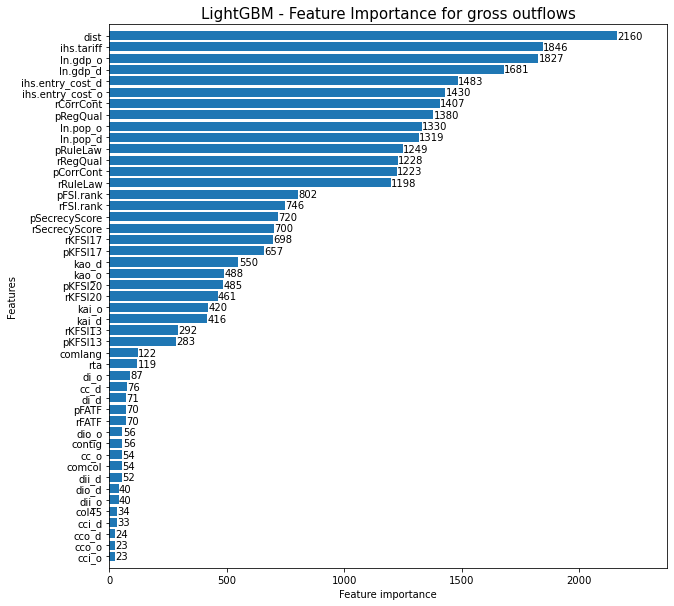

In [39]:
fig, ax = plt.subplots(figsize = (10,10))
lgb.plot_importance(lightGBM_mod_out, height = 0.8, ax = ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance for gross outflows", fontsize = 15)
plt.savefig(results_dir + 'LightGBM_feature_importance_out.png')

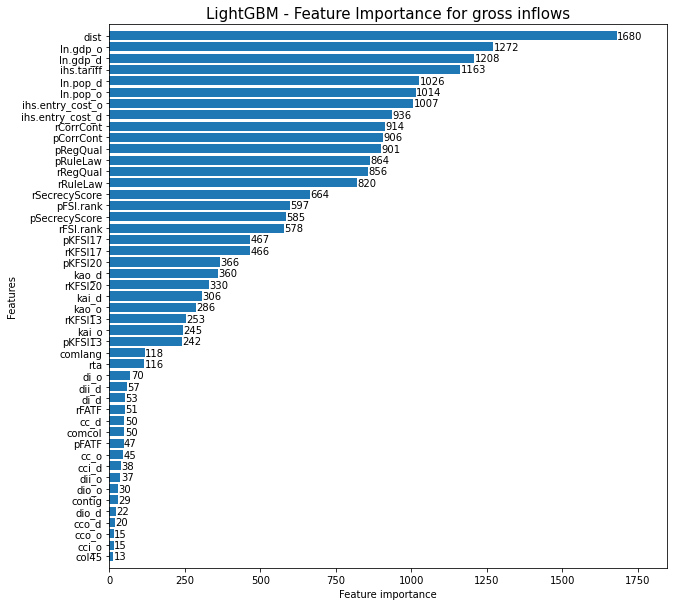

In [40]:
fig, ax = plt.subplots(figsize = (10,10))
lgb.plot_importance(lightGBM_mod_in, height = 0.8, ax = ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance for gross inflows", fontsize = 15)
plt.savefig(results_dir + 'LightGBM_feature_importance_in.png')

## Random Forests

In [41]:
RF_mod_out = RandomForestRegressor(max_depth = 10, random_state = 1509)
RF_mod_out.fit(X_train, Y_train_out.values.ravel())

RandomForestRegressor(max_depth=10, random_state=1509)

In [42]:
RF_mod_in = RandomForestRegressor(max_depth = 10, random_state = 1509)
RF_mod_in.fit(X_train, Y_train_in.values.ravel())

RandomForestRegressor(max_depth=10, random_state=1509)

In [43]:
preds_RF_train_out = RF_mod_out.predict(X_train)
preds_RF_test_out = RF_mod_out.predict(X_test)

In [44]:
preds_RF_train_in = RF_mod_in.predict(X_train)
preds_RF_test_in = RF_mod_in.predict(X_test)

In [45]:
feather.write_feather(pd.DataFrame(preds_RF_train_out), results_dir + 'preds.RF.train_out_agg.feather')
feather.write_feather(pd.DataFrame(preds_RF_test_out), results_dir + 'preds.RF.test_out_agg.feather')

In [46]:
feather.write_feather(pd.DataFrame(preds_RF_train_in), results_dir + 'preds.RF.train_in_agg.feather')
feather.write_feather(pd.DataFrame(preds_RF_test_in), results_dir + 'preds.RF.test_in_agg.feather')

In [47]:
print("RMSE of the training set (outflows):", np.sqrt(mean_squared_error(Y_train_out, preds_RF_train_out)))
print("R^2 of the training set (outflows):", r2_score(Y_train_out, preds_RF_train_out))
print("RMSE of the test set (outflows):", np.sqrt(mean_squared_error(Y_test_out, preds_RF_test_out)))
print("R^2 of the test set (outflows):", r2_score(Y_test_out, preds_RF_test_out))

RMSE of the training set (outflows): 1.308071168840158
R^2 of the training set (outflows): 0.8501822142473304
RMSE of the test set (outflows): 1.475163031106335
R^2 of the test set (outflows): 0.8029329942712846


In [48]:
print("RMSE of the training set (inflows):", np.sqrt(mean_squared_error(Y_train_in, preds_RF_train_in)))
print("R^2 of the training set (inflows):", r2_score(Y_train_in, preds_RF_train_in))
print("RMSE of the test set (inflows):", np.sqrt(mean_squared_error(Y_test_in, preds_RF_test_in)))
print("R^2 of the test set (inflows):", r2_score(Y_test_in, preds_RF_test_in))

RMSE of the training set (inflows): 1.3444297582806901
R^2 of the training set (inflows): 0.8369021149682602
RMSE of the test set (inflows): 1.6086537390964604
R^2 of the test set (inflows): 0.7618537319022352


In [49]:
print('Mean Absolute Error (outflows):', metrics.mean_absolute_error(Y_test_out, preds_RF_test_out))  
print('Mean Squared Error (outflows):', mean_squared_error(Y_test_out, preds_RF_test_out))
print('Dollar Mean Squared Error (outflows):', np.mean(np.square(np.exp(Y_test_out.values)/10**3 - np.exp(preds_RF_test_out)/10**3)))

Mean Absolute Error (outflows): 1.0041782202207592
Mean Squared Error (outflows): 2.17610596834283
Dollar Mean Squared Error (outflows): 16809639.143300068


In [50]:
print('Mean Absolute Error (inflows):', metrics.mean_absolute_error(Y_test_in, preds_RF_test_in))  
print('Mean Squared Error (inflows):', mean_squared_error(Y_test_in, preds_RF_test_in))
print('Dollar Mean Squared Error (inflows):', np.mean(np.square(np.exp(Y_test_in.values)/10**3 - np.exp(preds_RF_test_in)/10**3)))

Mean Absolute Error (inflows): 1.1264033934936384
Mean Squared Error (inflows): 2.5877668523090227
Dollar Mean Squared Error (inflows): 16725134.560078852


## Support Vector Machine

In [ ]:
SVM_mod = svm.SVR()
SVM_mod.fit(X_train, Y_train.values.ravel())

In [ ]:
preds_SVM_train = SVM_mod.predict(X_train)
preds_SVM_test = SVM_mod.predict(X_test)

In [ ]:
feather.write_feather(pd.DataFrame(preds_SVM_train), results_dir + 'preds.SVM.train_agg.feather')
feather.write_feather(pd.DataFrame(preds_SVM_test), results_dir + 'preds.SVM.test_agg.feather')

In [ ]:
print("RMSE of the training set:", np.sqrt(mean_squared_error(Y_train, preds_SVM_train)))
print("R^2 of the training set:", r2_score(Y_train, preds_SVM_train))

In [ ]:
print("RMSE of the test set:", np.sqrt(mean_squared_error(Y_test, preds_SVM_test)))
print("R^2 of the test set:", r2_score(Y_test, preds_SVM_test))

## Neural Networks

In [ ]:
Y_train = train_agg_smp[['Tot_IFF_t']]
X_train = train_agg_smp[features]
Y_test = test_agg_smp[['Tot_IFF_t']]
X_test = test_agg_smp[features]

In [ ]:
std_sc = StandardScaler()
NN_train = std_sc.fit_transform(X_train)
NN_test = std_sc.transform(X_test)

In [ ]:
NN_mod = MLPRegressor(hidden_layer_sizes = (10),
                      activation = "logistic",
                      random_state = 1, 
                      max_iter = 1000).fit(NN_train, Y_train.values.ravel())

In [ ]:
preds_NN_train = NN_mod.predict(NN_train)
preds_NN_test = NN_mod.predict(NN_test)

In [ ]:
feather.write_feather(pd.DataFrame(preds_NN_train), results_dir + 'preds.NN.train_agg.feather')
feather.write_feather(pd.DataFrame(preds_NN_test), results_dir + 'preds.NN.test_agg.feather')

In [ ]:
print("RMSE of the training set:", np.sqrt(mean_squared_error(Y_train, preds_NN_train)))
print("R^2 of the training set:", r2_score(Y_train, preds_NN_train))

In [ ]:
print("RMSE of the test set:", np.sqrt(mean_squared_error(Y_test, preds_NN_test)))
print("R^2 of the test set:", r2_score(Y_test, preds_NN_test))

### Tuning hyperparameters

In [ ]:
NN = MLPRegressor(max_iter = 1000)
parameter_space = {
    'hidden_layer_sizes': [(10,20)],
    'activation': ['logistic', 'relu'],
    #'solver': ['sgd', 'adam'],
    #'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant','adaptive'],
}

In [ ]:
NN_mod_tuned = GridSearchCV(NN, parameter_space, n_jobs = -1, cv = 3)

In [ ]:
NN_mod_tuned.fit(NN_train, Y_train.values.ravel())

In [ ]:
print('Best parameters found:\n', NN_mod_tuned.best_params_)

In [ ]:
# All results
means = NN_mod_tuned.cv_results_['mean_test_score']
stds = NN_mod_tuned.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, NN_mod_tuned.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
preds_NN_train = NN_mod_tuned.predict(NN_train)
preds_NN_test = NN_mod_tuned.predict(NN_test)

In [ ]:
feather.write_feather(pd.DataFrame(preds_NN_train), results_dir + 'preds.NN.train_agg.feather')
feather.write_feather(pd.DataFrame(preds_NN_test), results_dir + 'preds.NN.test_agg.feather')

In [ ]:
print("RMSE of the training set:", np.sqrt(mean_squared_error(Y_train, preds_NN_train)))
print("R^2 of the training set:", r2_score(Y_train, preds_NN_train))

In [ ]:
print("RMSE of the test set:", np.sqrt(mean_squared_error(Y_test, preds_NN_test)))
print("R^2 of the test set:", r2_score(Y_test, preds_NN_test))